In [1]:

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
bank_data= pd.read_csv("bank-marketing.csv")

In [3]:
bank_data.head()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [4]:
bank_data['default'] = bank_data['default'].map({'no':0,'yes':1,'unknown':0})
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1,'unknown':0})


In [5]:
bank_data

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,1,57,services,married,high.school,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,2,37,services,married,high.school,0,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,3,40,admin.,married,basic.6y,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,4,56,services,married,high.school,0,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,45,services,married,professional.course,0,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
96,96,42,management,married,university.degree,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
97,97,53,admin.,divorced,university.degree,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
98,98,37,technician,single,professional.course,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [6]:
feature_cols = ['age', 'default', 'cons.price.idx', 'cons.conf.idx']
X = bank_data[feature_cols]
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
bank_data

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,1,57,services,married,high.school,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,2,37,services,married,high.school,0,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,3,40,admin.,married,basic.6y,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,4,56,services,married,high.school,0,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,45,services,married,professional.course,0,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
96,96,42,management,married,university.degree,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
97,97,53,admin.,divorced,university.degree,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
98,98,37,technician,single,professional.course,0,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [8]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
y_pred = rf.predict(X_test)

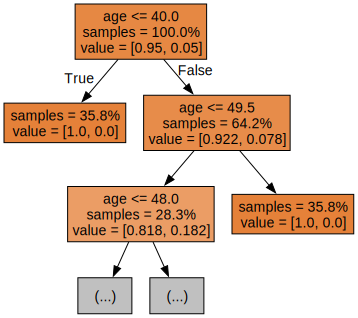

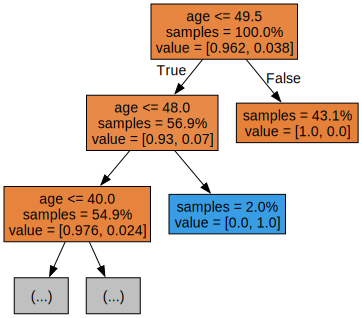

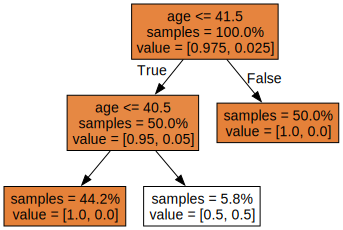

In [10]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

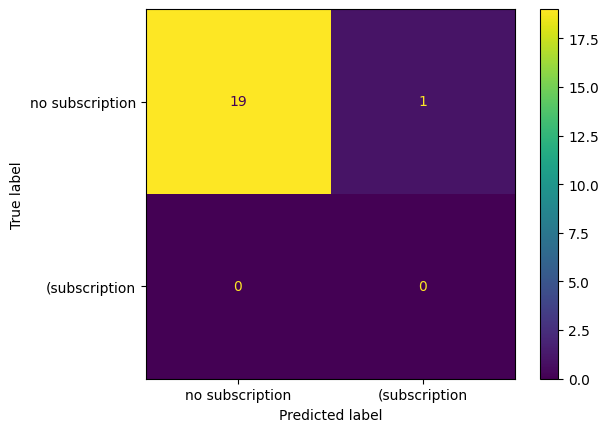

In [11]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
)
labels = ["no subscription", "subscription"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [13]:
accuracy = accuracy_score(y_pred, y_test,)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test, average="weighted", zero_division=0)
recall = recall_score(y_pred, y_test, average="weighted", zero_division=0)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.95
F1 Score: 0.9256410256410256
Precision: 0.9025000000000001
Recall: 0.95
